# Human Activity Recognition Using Smartphone Dataset

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

--prefix 't' in those metrics denotes time.
--suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Result Set(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were separated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'

# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.

* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [36]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


## Obtain the  train data 

In [37]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4062,0.272544,-0.017668,-0.105699,-0.973588,-0.979174,-0.961958,-0.973196,-0.976966,-0.955513,-0.925441,...,-0.08157,0.699503,0.103912,-0.056536,0.333674,-0.389219,-0.575634,21,6,LAYING


In [13]:
train.shape

(7352, 564)

## Obtain the  test data 

In [38]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1156,0.216076,-0.014232,-0.104598,-0.07077,-0.170106,-0.37129,-0.12779,-0.218118,-0.369037,0.078787,...,0.858839,-0.224608,-0.754813,0.414124,-0.912845,0.047113,-0.021692,10,1,WALKING


In [15]:
test.shape

(2947, 564)

In [39]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

# Data Cleaning

## 1. Check for Duplicates

In [17]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [18]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

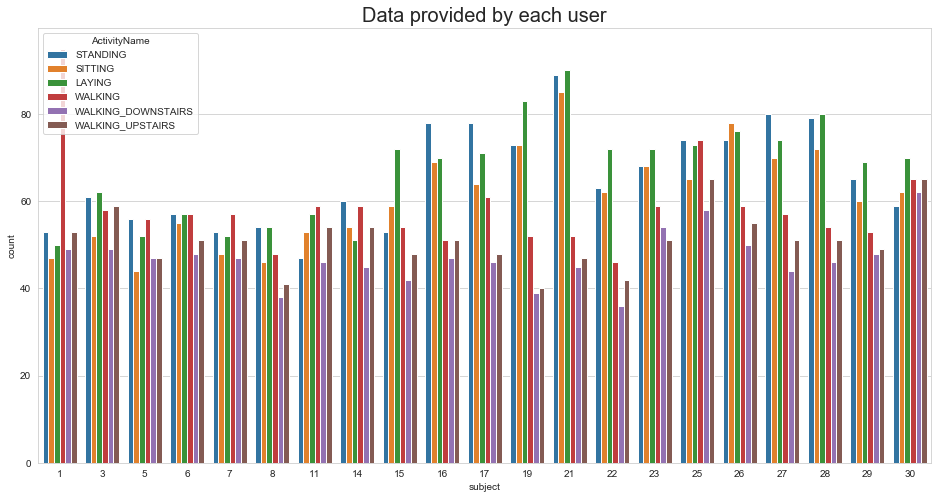

In [6]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

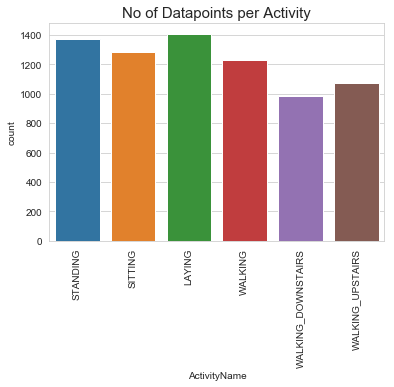

In [7]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [8]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '_')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [9]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

###  Magnitude of an acceleration

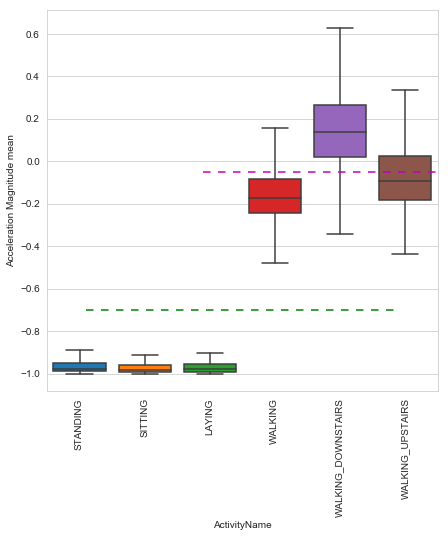

In [10]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMag_mean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

###  Position of GravityAccelerationComponants also matters 

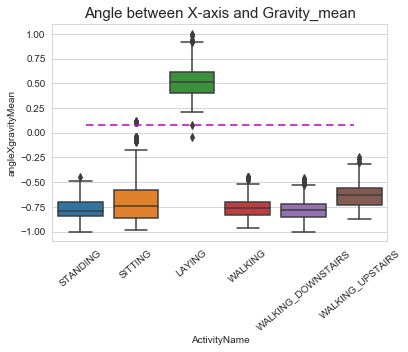

In [11]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

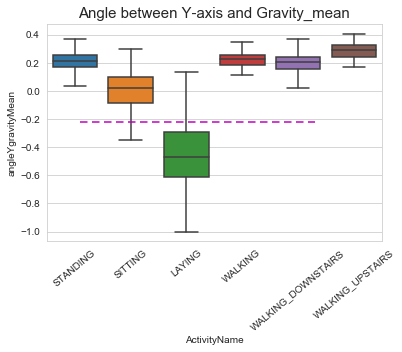

In [12]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

## Obtain the train and test data

In [13]:
train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [3]:
train.head(1)

,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING


In [4]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [5]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [6]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [43]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

## Using raw time series data and deep learning methods:
Approch 1 - Using LSTM  
Approch 2 - Using CNN - CNN are useful to get best features and realtions between sequnce data using convolution.

## LSTM

In [6]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [14]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [25]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [26]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [27]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [28]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, y_train, X_test,  y_test

In [23]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [17]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [29]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [30]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [31]:
# Loading the train and test data
X_train, Y_train, X_test,  Y_test = load_data()

In [33]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)
#n_classes  = 6
print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


#### Base Model

In [34]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 54s 7ms/step - loss: 1.3194 - acc: 0.4376 - val_loss: 1.1805 - val_acc: 0.4496
Epoch 2/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.9842 - acc: 0.5749 - val_loss: 0.9447 - val_acc: 0.5857
Epoch 3/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.7991 - acc: 0.6470 - val_loss: 0.7865 - val_acc: 0.6132
Epoch 4/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.6984 - acc: 0.6661 - val_loss: 0.8261 - val_acc: 0.5901
Epoch 5/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.6306 - acc: 0.6876 - val_loss: 0.7671 - val_acc: 0.6434
Epoch 6/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.6168 - acc: 0.7084 - val_loss: 0.8407 - val_acc: 0.6590
Epoch 7/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.6056 - acc: 0.7361 - val_loss: 0.6495 - val_acc: 0.7248
Epoch 8

#### Multi layer LSTM

In [16]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(28,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_6 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 109s 15ms/step - loss: 1.3081 - acc: 0.4561 - val_loss: 0.9680 - val_acc: 0.5409
Epoch 2/30
7352/7352 [==============================] - 107s 15ms/step - loss: 0.8821 - acc: 0.6051 - val_loss: 0.8140 - val_acc: 0.6284
Epoch 3/30
7352/7352 [==============================] - 106s 14ms/step - loss: 0.7624 - acc: 0.6359 - val_loss: 0.8088 - val_acc: 0.6037
Epoch 4/30
7352/7352 [==============================] - 104s 14ms/step - loss: 0.7258 - acc: 0.6302 - val_loss: 0.7932 - val_acc: 0.6189
Epoch 5/30
7352/7352 [==============================] - 104s 14ms/step - loss: 0.7122 - acc: 0.6474 - val_loss: 0.7969 - val_acc: 0.6189
Epoch 6/30
7352/7352 [==============================] - 104s 14ms/step - loss: 0.6977 - acc: 0.6515 - val_loss: 0.7787 - val_acc: 0.6152
Epoch 7/30
7352/7352 [==============================] - 104s 14ms/step - loss: 0.6750 - acc: 0.6790 - val_loss: 0.7335 - val_acc: 

Above 2 layer LSTM is giving similar score as 1 layer LSTM which we trained above. 

In [14]:
from keras.regularizers import l2

In [20]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,recurrent_regularizer=l2(0.003),return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(28,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_8 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
# Training the model
History = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=10)

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 107s 15ms/step - loss: 1.4263 - acc: 0.4241 - val_loss: 1.2625 - val_acc: 0.5175
Epoch 2/10
7352/7352 [==============================] - 105s 14ms/step - loss: 1.2066 - acc: 0.5011 - val_loss: 1.5878 - val_acc: 0.3549
Epoch 3/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.9923 - acc: 0.5695 - val_loss: 0.9060 - val_acc: 0.6162
Epoch 4/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.9109 - acc: 0.5839 - val_loss: 0.8547 - val_acc: 0.5962
Epoch 5/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.7995 - acc: 0.6223 - val_loss: 0.7806 - val_acc: 0.6176
Epoch 6/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.8123 - acc: 0.6062 - val_loss: 0.8927 - val_acc: 0.5887
Epoch 7/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.7574 - acc: 0.6319 - val_loss: 0.7507 - val_acc: 

### Hyperparameter Tuning Using Hyperas:

In [18]:
# Importing tensorflow
np.random.seed(36)
import tensorflow as tf
tf.set_random_seed(36)

In [5]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperas.utils import eval_hyperopt_space

In [6]:
##gives train and validation data 
def data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).as_matrix()) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        return pd.get_dummies(y).as_matrix()
    
    X_train, X_val = load_signals('train'), load_signals('test')
    Y_train, Y_val = load_y('train'), load_y('test')

    return X_train, Y_train, X_val,  Y_val

In [7]:
from keras.regularizers import l2
import keras

In [8]:
def model(X_train, Y_train, X_val, Y_val):
    # Importing tensorflow
    np.random.seed(36)
    import tensorflow as tf
    tf.set_random_seed(36)
    # Initiliazing the sequential model
    model = Sequential() 
    if conditional({{choice(['one', 'two'])}}) == 'two':
        # Configuring the parameters
        model.add(LSTM({{choice([28,32,38])}},recurrent_regularizer=l2({{uniform(0,0.0002)}}),return_sequences=True,input_shape=(128, 9),name='LSTM2_1'))
        # Adding a dropout layer
        model.add(Dropout({{uniform(0.35,0.65)}},name='Dropout2_1'))
        model.add(LSTM({{choice([26,32,36])}},recurrent_regularizer=l2({{uniform(0,0.001)}}),input_shape=(128, 9),name='LSTM2_2'))
        model.add(Dropout({{uniform(0.5,0.7)}},name='Dropout2_2'))
        # Adding a dense output layer with sigmoid activation
        model.add(Dense(6, activation='sigmoid'))
    else:
        # Configuring the parameters
        model.add(LSTM({{choice([28,32,36])}},recurrent_regularizer=l2({{uniform(0,0.001)}}),input_shape=(128, 9),name='LSTM1_1'))
        # Adding a dropout layer
        model.add(Dropout({{uniform(0.35,0.55)}},name='Dropout1_1'))
        # Adding a dense output layer with sigmoid activation
        model.add(Dense(6, activation='sigmoid'))
        
    adam = keras.optimizers.Adam(lr={{uniform(0.009,0.025)}})
    rmsprop = keras.optimizers.RMSprop(lr={{uniform(0.009,0.025)}})
   
    choiceval = {{choice(['adam', 'rmsprop'])}}
    
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    
    print(model.summary())
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    result = model.fit(X_train, Y_train,
              batch_size=16,
              nb_epoch=30,
              verbose=2,
              validation_data=(X_val, Y_val))
                       
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    print('Test accuracy:', acc)
    print('-------------------------------------------------------------------------------------')
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [43]:
X_train, Y_train, X_val, Y_val = data()
trials = Trials()
best_run, best_model, space = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=15,
                                      trials=trials,notebook_name = 'Human Activity Detection',
                                     return_space = True)

>>> Imports:
#coding=utf-8

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import LSTM
except:
    pass

try:
    from keras.layers.core import Dense, Dropout
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from keras.regularizers import l2
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import keras
except:
    pass

try:
    import pickle
except:
    pass

try:
    from hyperas.utils import eval_hyperopt_space
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'conditional': hp.choice('conditional', ['one', 'two']),
        'LSTM': hp.choice('LSTM', [28,32,38]),


In [48]:
total_trials = dict()
for t, trial in enumerate(trials):
        vals = trial.get('misc').get('vals')
        print('Model',t+1,'parameters')
        print(vals)
        print()
        z = eval_hyperopt_space(space, vals)
        total_trials['M'+str(t+1)] = z
        print(z)
        print('------------------------------------------------')

Model 1 parameters
{'Dropout': [0.36598023572757926], 'Dropout_1': [0.6047146037530785], 'Dropout_2': [0.5188826519950874], 'LSTM': [0], 'LSTM_1': [1], 'LSTM_2': [1], 'choiceval': [1], 'conditional': [0], 'l2': [0.00016900597529479822], 'l2_1': [0.0006108763092812357], 'l2_2': [0.0007371698374615214], 'lr': [0.01942874904782045], 'lr_1': [0.015993860150909475]}

{'Dropout': 0.36598023572757926, 'Dropout_1': 0.6047146037530785, 'Dropout_2': 0.5188826519950874, 'LSTM': 28, 'LSTM_1': 32, 'LSTM_2': 32, 'choiceval': 'rmsprop', 'conditional': 'one', 'l2': 0.00016900597529479822, 'l2_1': 0.0006108763092812357, 'l2_2': 0.0007371698374615214, 'lr': 0.01942874904782045, 'lr_1': 0.015993860150909475}
------------------------------------------------
Model 2 parameters
{'Dropout': [0.604072168386432], 'Dropout_1': [0.5642077861572957], 'Dropout_2': [0.4689742513688654], 'LSTM': [0], 'LSTM_1': [1], 'LSTM_2': [0], 'choiceval': [1], 'conditional': [1], 'l2': [2.221286943616341e-06], 'l2_1': [0.0009770

In [54]:
best_run

{'Dropout': 0.3802031741395868,
 'Dropout_1': 0.6903389204823146,
 'Dropout_2': 0.3654341425327902,
 'LSTM': 2,
 'LSTM_1': 2,
 'LSTM_2': 1,
 'choiceval': 0,
 'conditional': 0,
 'l2': 0.00015208023802140732,
 'l2_1': 0.000643128044948208,
 'l2_2': 0.0007102309264917989,
 'lr': 0.016347608866364167,
 'lr_1': 0.024543333891182614}

In [55]:
#BEST MODEL PARAMS
total_trials['M14']

{'Dropout': 0.3802031741395868,
 'Dropout_1': 0.6903389204823146,
 'Dropout_2': 0.3654341425327902,
 'LSTM': 38,
 'LSTM_1': 36,
 'LSTM_2': 32,
 'choiceval': 'adam',
 'conditional': 'one',
 'l2': 0.00015208023802140732,
 'l2_1': 0.000643128044948208,
 'l2_2': 0.0007102309264917989,
 'lr': 0.016347608866364167,
 'lr_1': 0.024543333891182614}

In [50]:
#layes of best model
best_model.layers

In [51]:
X_train, Y_train, X_val, Y_val = data()

In [56]:
_,val_acc = best_model.evaluate(X_val, Y_val, verbose=0)
_,train_acc = best_model.evaluate(X_train, Y_train, verbose=0)
print('Train_accuracy',val_acc)
print('validation accuracy',val_acc)

Train_accuracy 0.94560663764961915
validation accuracy 0.9199185612487275


In [15]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix_rnn(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    #return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    return metrics.confusion_matrix(Y_true, Y_pred)

In [74]:
# Confusion Matrix
print(confusion_matrix_rnn(Y_val, best_model.predict(X_val)))

[[537   0   0   0   0   0]
 [  1 412  75   0   0   3]
 [  0  88 444   0   0   0]
 [  0   0   0 464  10  22]
 [  0   0   0  15 390  15]
 [  0   4   0   2   1 464]]


In [16]:
from sklearn import metrics

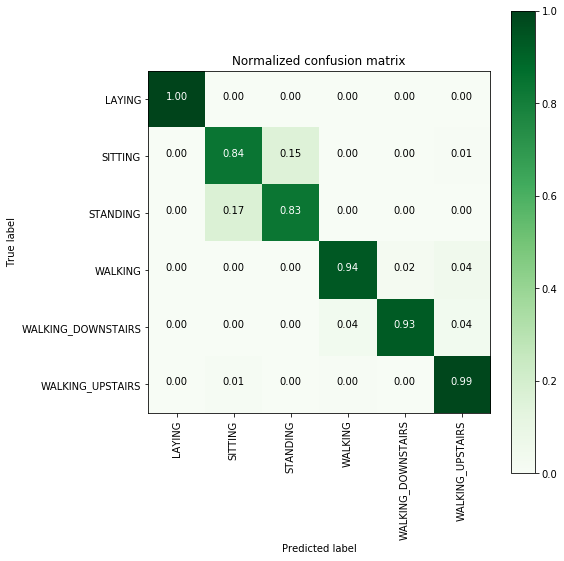

In [80]:
plt.figure(figsize=(8,8))
cm = confusion_matrix_rnn(Y_val, best_model.predict(X_val))
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

## Using CNN

In [2]:
import os
os.environ['PYTHONHASHSEED'] = '0'
import numpy as np
import tensorflow as tf
import random as rn
np.random.seed(36)
rn.seed(36)
tf.set_random_seed(36)
# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(36)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [3]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [18]:
X_train, Y_train, X_val, Y_val = data()

In [19]:
###Scling data
from sklearn.base import BaseEstimator, TransformerMixin
class scaling_tseries_data(BaseEstimator, TransformerMixin):
    from sklearn.preprocessing import StandardScaler
    def __init__(self):
        self.scale = None

    def transform(self, X):
        temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
        temp_X1 = self.scale.transform(temp_X1)
        return temp_X1.reshape(X.shape)

    def fit(self, X):
        # remove overlaping
        remove = int(X.shape[1] / 2)
        temp_X = X[:, -remove:, :]
        # flatten data
        temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
        scale = StandardScaler()
        scale.fit(temp_X)
        self.scale = scale
        return self

In [20]:
Scale = scaling_tseries_data()
Scale.fit(X_train)
X_train_sc = Scale.transform(X_train)
X_val_sc = Scale.transform(X_val)

In [21]:
print('Shape of scaled X train',X_train_sc.shape)
print('Shape of scaled X test',X_val_sc.shape)

Shape of scaled X train (7352, 128, 9)
Shape of scaled X test (2947, 128, 9)


#### Base Model

In [26]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform',input_shape=(128,9)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 126, 32)           896       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 124, 32)           3104      
_________________________________________________________________
dropout_1 (Dropout)          (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1984)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                99250     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 306       
Total para

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit(X_train_sc,Y_train, epochs=30, batch_size=16,validation_data=(X_val_sc, Y_val), verbose=1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 6s 764us/step - loss: 0.4207 - acc: 0.8403 - val_loss: 0.3384 - val_acc: 0.8748
Epoch 2/30
7352/7352 [==============================] - 5s 685us/step - loss: 0.1448 - acc: 0.9411 - val_loss: 0.3163 - val_acc: 0.8799
Epoch 3/30
7352/7352 [==============================] - 5s 672us/step - loss: 0.1177 - acc: 0.9486 - val_loss: 0.2963 - val_acc: 0.9226
Epoch 4/30
7352/7352 [==============================] - 5s 686us/step - loss: 0.0912 - acc: 0.9566 - val_loss: 0.2926 - val_acc: 0.9097
Epoch 5/30
7352/7352 [==============================] - 5s 691us/step - loss: 0.0987 - acc: 0.9567 - val_loss: 0.3676 - val_acc: 0.9036
Epoch 6/30
7352/7352 [==============================] - 5s 678us/step - loss: 0.0841 - acc: 0.9619 - val_loss: 0.3184 - val_acc: 0.9036
Epoch 7/30
7352/7352 [==============================] - 5s 695us/step - loss: 0.0727 - acc: 0.9659 - val_loss: 0.3215 - val_acc: 0.9169


it is giving some good score in train as well as test but it is overfitting so much. i will try some regularization in below models. 

In [3]:
from keras.regularizers import l2,l1
import keras
from keras.layers import BatchNormalization

In [117]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.1),input_shape=(128,9)))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu',kernel_regularizer=l2(0.06),kernel_initializer='he_uniform'))
model.add(Dropout(0.65))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_67 (Conv1D)           (None, 126, 32)           896       
_________________________________________________________________
conv1d_68 (Conv1D)           (None, 124, 16)           1552      
_________________________________________________________________
dropout_39 (Dropout)         (None, 124, 16)           0         
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 62, 16)            0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 992)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 32)                31776     
_________________________________________________________________
dense_68 (Dense)             (None, 6)                 198       
Total para

In [118]:
import math
adam = keras.optimizers.Adam(lr=0.001)
rmsprop = keras.optimizers.RMSprop(lr=0.001)
def step_decay(epoch):
    return float(0.001 * math.pow(0.6, math.floor((1+epoch)/10)))
from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [119]:
model.fit(X_train_sc,Y_train, epochs=30, batch_size=16,validation_data=(X_val_sc, Y_val), verbose=1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 6s 879us/step - loss: 4.3454 - acc: 0.7266 - val_loss: 1.5457 - val_acc: 0.7815
Epoch 2/30
7352/7352 [==============================] - 5s 676us/step - loss: 0.7579 - acc: 0.9121 - val_loss: 0.6360 - val_acc: 0.8935
Epoch 3/30
7352/7352 [==============================] - 5s 668us/step - loss: 0.3876 - acc: 0.9286 - val_loss: 0.5337 - val_acc: 0.8772
Epoch 4/30
7352/7352 [==============================] - 5s 673us/step - loss: 0.3123 - acc: 0.9283 - val_loss: 0.4940 - val_acc: 0.8673
Epoch 5/30
7352/7352 [==============================] - 5s 680us/step - loss: 0.2729 - acc: 0.9336 - val_loss: 0.4439 - val_acc: 0.8901
Epoch 6/30
7352/7352 [==============================] - 5s 676us/step - loss: 0.2629 - acc: 0.9327 - val_loss: 0.4330 - val_acc: 0.8775
Epoch 7/30
7352/7352 [==============================] - 5s 664us/step - loss: 0.2423 - acc: 0.9393 - val_loss: 0.4225 - val_acc: 0.8711


#### Hyper Parameter Tuning Using Hyperas

In [4]:
def data_scaled():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    from sklearn.base import BaseEstimator, TransformerMixin
    class scaling_tseries_data(BaseEstimator, TransformerMixin):
        from sklearn.preprocessing import StandardScaler
        def __init__(self):
            self.scale = None

        def transform(self, X):
            temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
            temp_X1 = self.scale.transform(temp_X1)
            return temp_X1.reshape(X.shape)

        def fit(self, X):
            # remove overlaping
            remove = int(X.shape[1] / 2)
            temp_X = X[:, -remove:, :]
            # flatten data
            temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
            scale = StandardScaler()
            scale.fit(temp_X)
            self.scale = scale
            return self
        
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).as_matrix()) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        return pd.get_dummies(y).as_matrix()
    
    X_train, X_val = load_signals('train'), load_signals('test')
    Y_train, Y_val = load_y('train'), load_y('test')
    ###Scling data
    Scale = scaling_tseries_data()
    Scale.fit(X_train)
    X_train = Scale.transform(X_train)
    X_val = Scale.transform(X_val)

    return X_train, Y_train, X_val,  Y_val

In [5]:
X_train, Y_train, X_val,  Y_val = data_scaled()

In [6]:
def model_cnn(X_train, Y_train, X_val, Y_val):
    # Importing tensorflow
    np.random.seed(36)
    import tensorflow as tf
    tf.set_random_seed(36)
    # Initiliazing the sequential model
    model = Sequential()
    
    model.add(Conv1D(filters={{choice([28,32,42])}}, kernel_size={{choice([3,5,7])}},activation='relu',kernel_initializer='he_uniform',
                 kernel_regularizer=l2({{uniform(0,2.5)}}),input_shape=(128,9)))
    
    model.add(Conv1D(filters={{choice([16,24,32])}}, kernel_size={{choice([3,5,7])}}, 
                     activation='relu',kernel_regularizer=l2({{uniform(0,1.5)}}),kernel_initializer='he_uniform'))
    model.add(Dropout({{uniform(0.45,0.7)}}))
    model.add(MaxPooling1D(pool_size={{choice([2,3])}}))
    model.add(Flatten())
    model.add(Dense({{choice([32,64])}}, activation='relu'))
    model.add(Dense(6, activation='softmax'))
        
    adam = keras.optimizers.Adam(lr={{uniform(0.00065,0.004)}})
    rmsprop = keras.optimizers.RMSprop(lr={{uniform(0.00065,0.004)}})
   
    choiceval = {{choice(['adam', 'rmsprop'])}}
    
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    
    print(model.summary())
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    result = model.fit(X_train, Y_train,
              batch_size={{choice([16,32,64])}},
              nb_epoch={{choice([25,30,35])}},
              verbose=2,
              validation_data=(X_val, Y_val))
                       
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    score1, acc1 = model.evaluate(X_train, Y_train, verbose=0)
    print('Train accuracy',acc1,'Test accuracy:', acc)
    print('-------------------------------------------------------------------------------------')
    return {'loss': -acc, 'status': STATUS_OK, 'model': model,'train_acc':acc1}

In [25]:
X_train, Y_train, X_val, Y_val = data_scaled()
trials = Trials()
best_run, best_model, space = optim.minimize(model=model_cnn,
                                      data=data_scaled,
                                      algo=tpe.suggest,
                                      max_evals=100,
                                      trials=trials,notebook_name = 'Human Activity Recognition',
                                      return_space = True)

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import random as rn
except:
    pass

try:
    from keras import backend as K
except:
    pass

try:
    import pickle
except:
    pass

try:
    import keras
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import LSTM
except:
    pass

try:
    from keras.layers.core import Dense, Dropout
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    from matplotlib import pyplot
except:
    pass

try:
    from sklearn.preprocessing import StandardScaler
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Flatten
except:
   

In [10]:
from hyperas.utils import eval_hyperopt_space
total_trials = dict()
total_list = []
for t, trial in enumerate(trials):
        vals = trial.get('misc').get('vals')
        z = eval_hyperopt_space(space, vals)
        total_trials['M'+str(t+1)] = z

In [11]:
best_run

{'Dense': 1,
 'Dropout': 0.6397045095598795,
 'batch_size': 2,
 'choiceval': 0,
 'filters': 1,
 'filters_1': 1,
 'kernel_size': 2,
 'kernel_size_1': 0,
 'l2': 0.07999281751224634,
 'l2_1': 0.0012673510937627475,
 'lr': 0.0011215010543928203,
 'lr_1': 0.0021517590741381726,
 'nb_epoch': 0,
 'pool_size': 1}

In [12]:
#best Hyper params from hyperas
eval_hyperopt_space(space, best_run)

{'Dense': 64,
 'Dropout': 0.6397045095598795,
 'batch_size': 64,
 'choiceval': 'adam',
 'filters': 32,
 'filters_1': 24,
 'kernel_size': 7,
 'kernel_size_1': 3,
 'l2': 0.07999281751224634,
 'l2_1': 0.0012673510937627475,
 'lr': 0.0011215010543928203,
 'lr_1': 0.0021517590741381726,
 'nb_epoch': 25,
 'pool_size': 3}

In [13]:
best_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_119 (Conv1D)          (None, 122, 32)           2048      
_________________________________________________________________
conv1d_120 (Conv1D)          (None, 120, 24)           2328      
_________________________________________________________________
dropout_60 (Dropout)         (None, 120, 24)           0         
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 40, 24)            0         
_________________________________________________________________
flatten_60 (Flatten)         (None, 960)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 64)                61504     
_________________________________________________________________
dense_120 (Dense)            (None, 6)                 390       
Total para

In [14]:
_,acc_val = best_model.evaluate(X_val,Y_val,verbose=0)
_,acc_train = best_model.evaluate(X_train,Y_train,verbose=0)
print('Train_accuracy',acc_train,'test_accuracy',acc_val)

Train_accuracy 0.963139281828074 test_accuracy 0.9229725144214456


In [35]:
# Confusion Matrix
print(confusion_matrix_rnn(Y_val, best_model.predict(X_val)))

[[537   0   0   0   0   0]
 [  0 385  81   0   0  25]
 [  0  80 452   0   0   0]
 [  0   0   0 484  10   2]
 [  0   0   0   0 415   5]
 [  0   1   0   0  23 447]]


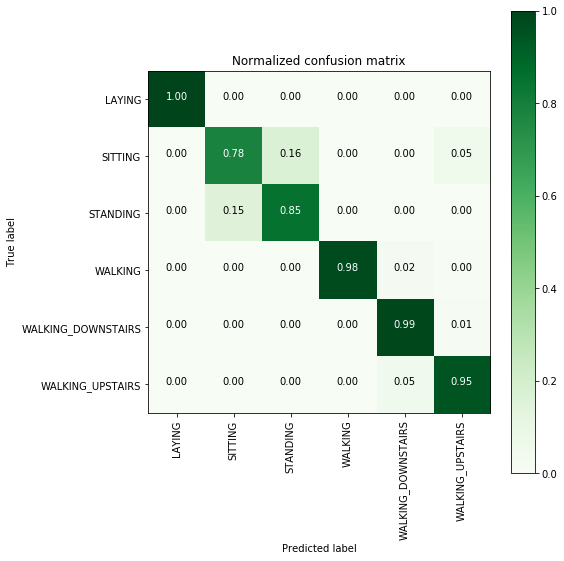

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
cm = confusion_matrix_rnn(Y_val, best_model.predict(X_val))
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()